Investigating correlations between all innovation variables. When interpreting the results, note that distance of search ( individual ) is on the same scale as dissimilarity whereas template similarity, variety, rareness are on a same scale. 

> **Correlation between innovation metrics**

**Innovation Metrics in the form of stages** (Phase 1- 2, Phase 2- 3, Phase 3-4, Phase 4 - 5 )
* Individual Exploration 
* Relational Novelty 

**Innovation Metrics in the form of phases** (Phase 1, Phase 2, Phase 3, Phase 4, Phase 5 )
* Rareness
* Variety
* Template Functions Count 

> **How does scores correlates with innovation metrics?**

**Innovation Metrics in the form of stages** (Phase 1- 2, Phase 2- 3, Phase 3-4, Phase 4 - 5 )
* Individual Exploration ~ correlations with improvement scores of all dimensions
* Relational Novelty ~ correlations with improvement scores of all dimensions 

**Innovation Metrics in the form of phases** (Phase 1, Phase 2, Phase 3, Phase 4, Phase 5 )
* Rareness ~ correlations with absolute scores of each phase of all dimensions
* Variety ~  correlations with absolute scores of each phase all dimensions
* Template Functions Count ~  correlations with absolute scores of each phase all dimensions


In [1]:
# retrieved variables from distance search

%store -r phase12_bogota0
%store -r phase23_bogota0
%store -r phase34_bogota0
%store -r phase45_bogota0

%store -r phase12_bogota1
%store -r phase23_bogota1
%store -r phase34_bogota1
%store -r phase45_bogota1

%store -r phase12_bogota2
%store -r phase23_bogota2
%store -r phase34_bogota2
%store -r phase45_bogota2

%store -r phase12_bogota3
%store -r phase23_bogota3
%store -r phase34_bogota3
%store -r phase45_bogota3

In [2]:
# retrived variables from relational novelty

%store -r stage1_bogota0_high_similarity
%store -r stage1_bogota1_high_similarity
%store -r stage1_bogota2_high_similarity
%store -r stage1_bogota3_high_similarity

%store -r stage2_bogota0_high_similarity
%store -r stage2_bogota1_high_similarity
%store -r stage2_bogota2_high_similarity
%store -r stage2_bogota3_high_similarity

%store -r stage3_bogota0_high_similarity
%store -r stage3_bogota1_high_similarity
%store -r stage3_bogota2_high_similarity
%store -r stage3_bogota3_high_similarity

%store -r stage4_bogota0_high_similarity
%store -r stage4_bogota1_high_similarity
%store -r stage4_bogota2_high_similarity
%store -r stage4_bogota3_high_similarity

In [3]:
# retrieved from functional variety notebook 

%store -r overall_phase1_bogota0
%store -r overall_phase2_bogota0
%store -r overall_phase3_bogota0
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0

%store -r overall_phase1_bogota1
%store -r overall_phase2_bogota1
%store -r overall_phase3_bogota1
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1

%store -r overall_phase1_bogota2
%store -r overall_phase2_bogota2
%store -r overall_phase3_bogota2
%store -r overall_phase4_bogota2
%store -r overall_phase5_bogota2

%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r overall_phase3_bogota3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

In [4]:
# retrieve variables from rareness notebook

%store -r group0_phase1_match10
%store -r group0_phase2_match10
%store -r group0_phase3_match10
%store -r group0_phase4_match10
%store -r group0_phase5_match10

%store -r group1_phase1_match10
%store -r group1_phase2_match10
%store -r group1_phase3_match10
%store -r group1_phase4_match10
%store -r group1_phase5_match10

%store -r group2_phase1_match10
%store -r group2_phase2_match10
%store -r group2_phase3_match10
%store -r group2_phase4_match10
%store -r group2_phase5_match10

%store -r group3_phase1_match10
%store -r group3_phase2_match10
%store -r group3_phase3_match10
%store -r group3_phase4_match10
%store -r group3_phase5_match10

In [5]:
# retrieve variables from score notebook 

%store -r bogota_0
%store -r bogota_1
%store -r bogota_2
%store -r bogota_3

In [6]:
stage1_bogota0_high_similarity['similarity'] = 1 - stage1_bogota0_high_similarity['similarity']
stage2_bogota0_high_similarity['similarity'] = 1 - stage2_bogota0_high_similarity['similarity']
stage3_bogota0_high_similarity['similarity'] = 1 - stage3_bogota0_high_similarity['similarity']
stage4_bogota0_high_similarity['similarity'] = 1 - stage4_bogota0_high_similarity['similarity']

stage1_bogota1_high_similarity['similarity'] = 1 - stage1_bogota1_high_similarity['similarity']
stage2_bogota1_high_similarity['similarity'] = 1 - stage2_bogota1_high_similarity['similarity']
stage3_bogota1_high_similarity['similarity'] = 1 - stage3_bogota1_high_similarity['similarity']
stage4_bogota1_high_similarity['similarity'] = 1 - stage4_bogota1_high_similarity['similarity']

stage1_bogota2_high_similarity['similarity'] = 1 - stage1_bogota2_high_similarity['similarity']
stage2_bogota2_high_similarity['similarity'] = 1 - stage2_bogota2_high_similarity['similarity']
stage3_bogota2_high_similarity['similarity'] = 1 - stage3_bogota2_high_similarity['similarity']
stage4_bogota2_high_similarity['similarity'] = 1 - stage4_bogota2_high_similarity['similarity']

stage1_bogota3_high_similarity['similarity'] = 1 - stage1_bogota3_high_similarity['similarity']
stage2_bogota3_high_similarity['similarity'] = 1 - stage2_bogota3_high_similarity['similarity']
stage3_bogota3_high_similarity['similarity'] = 1 - stage3_bogota3_high_similarity['similarity']
stage4_bogota3_high_similarity['similarity'] = 1 - stage4_bogota3_high_similarity['similarity']

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import functools

In [8]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix


def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

## Bogota 0 Correlations ( Relational Novelty and Individual Exploration )

In [9]:
stage1_bogota0_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota0_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota0_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota0_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota0.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota0.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota0.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota0.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota0.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

group0_phase1_match10.rename(columns={'len_match': 'p1-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase2_match10.rename(columns={'len_match': 'p2-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase3_match10.rename(columns={'len_match': 'p3-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase4_match10.rename(columns={'len_match': 'p4-len-rare', 'Student': 'user2'}, inplace=True)
group0_phase5_match10.rename(columns={'len_match': 'p5-len-rare', 'Student': 'user2'}, inplace=True)

phase12_total = bogota_0[['Student', 'improve-total-12']].copy()
phase12_total.rename(columns={'Student': 'user2'}, inplace=True)
phase23_total = bogota_0[['Student', 'improve-total-23']].copy()
phase23_total.rename(columns={'Student': 'user2'}, inplace=True)
phase34_total = bogota_0[['Student', 'improve-total-34']].copy()
phase34_total.rename(columns={'Student': 'user2'}, inplace=True)
phase45_total = bogota_0[['Student', 'improve-total-45']].copy()
phase45_total.rename(columns={'Student': 'user2'}, inplace=True)

group0_phase1_match10['p1-len-rare'] = group0_phase1_match10['p1-len-rare'].fillna(0)
group0_phase2_match10['p2-len-rare'] = group0_phase2_match10['p2-len-rare'].fillna(0)
group0_phase3_match10['p3-len-rare'] = group0_phase3_match10['p3-len-rare'].fillna(0)
group0_phase4_match10['p4-len-rare'] = group0_phase4_match10['p4-len-rare'].fillna(0)
group0_phase5_match10['p5-len-rare'] = group0_phase5_match10['p5-len-rare'].fillna(0)

group0_phase1_match10 = group0_phase1_match10.drop('Group', axis=1)
group0_phase2_match10 = group0_phase2_match10.drop('Group', axis=1)
group0_phase3_match10 = group0_phase3_match10.drop('Group', axis=1)
group0_phase4_match10 = group0_phase4_match10.drop('Group', axis=1)
group0_phase5_match10 = group0_phase5_match10.drop('Group', axis=1)

In [10]:
phase12_bogota0['exploration'] = 1 - phase12_bogota0['similarity']
phase23_bogota0['exploration'] = 1 - phase23_bogota0['similarity']
phase34_bogota0['exploration'] = 1 - phase34_bogota0['similarity']
phase45_bogota0['exploration'] = 1 - phase45_bogota0['similarity']

phase12_bogota0.rename(columns={'exploration': 's1-ind-dist'}, inplace=True)
phase23_bogota0.rename(columns={'exploration': 's2-ind-dist'}, inplace=True)
phase34_bogota0.rename(columns={'exploration': 's3-ind-dist'}, inplace=True)
phase45_bogota0.rename(columns={'exploration': 's4-ind-dist'}, inplace=True)

In [11]:
dfs = [stage1_bogota0_high_similarity[['user2', 's1-dissimilar']], stage2_bogota0_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota0_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota0_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota0[['user2', 's1-ind-dist']], phase23_bogota0[['user2', 's2-ind-dist']], phase34_bogota0[['user2', 's3-ind-dist']], phase45_bogota0[['user2', 's4-ind-dist']],
       phase12_total[['user2', 'improve-total-12']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota0_stage_metrics = df_final.drop('user2', axis=1)

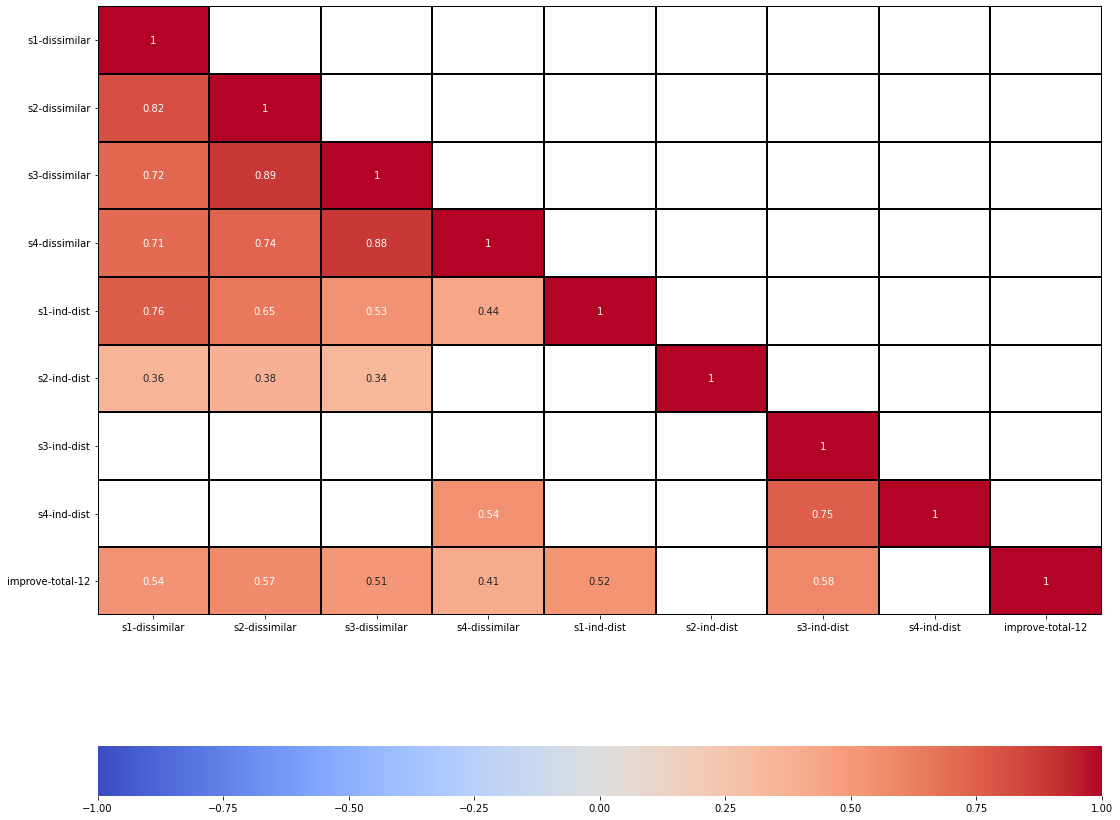

In [12]:
corr = bogota0_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota0_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 0 Correlations ( Variety and Rareness )

In [13]:
dfs = [overall_phase1_bogota0[['user2', 'p1-len-unique']], overall_phase2_bogota0[['user2', 'p2-len-unique']], overall_phase3_bogota0[['user2', 'p3-len-unique']], overall_phase4_bogota0[['user2', 'p4-len-unique']], overall_phase5_bogota0[['user2', 'p5-len-unique']], 
      group0_phase1_match10[['user2', 'p1-len-rare']], group0_phase2_match10[['user2', 'p2-len-rare']], group0_phase3_match10[['user2', 'p3-len-rare']], group0_phase4_match10[['user2', 'p4-len-rare']], group0_phase5_match10[['user2', 'p5-len-rare']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota0_phase_metrics = df_final.drop('user2', axis=1)

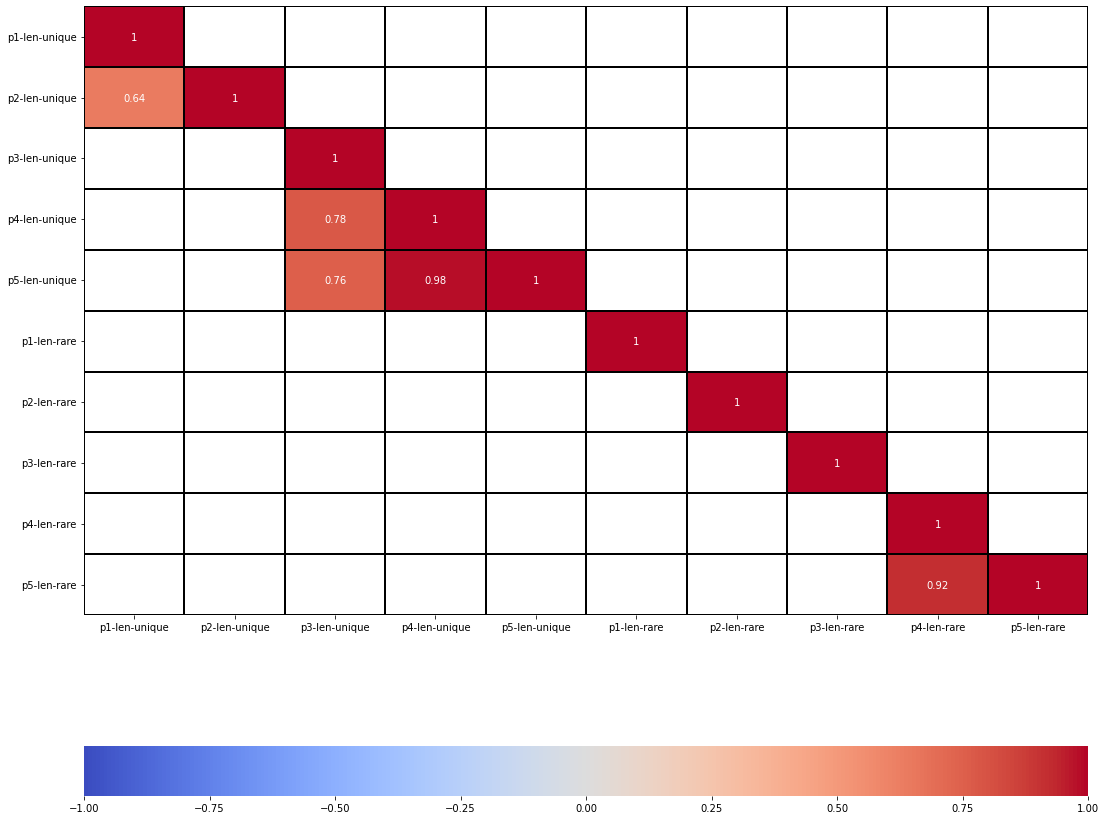

In [14]:
corr = bogota0_phase_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota0_phase_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 0 Correlations (Relational Novelty & Individual Exploration vs Total Improvement Score)

In [15]:
dfs = [stage1_bogota0_high_similarity[['user2', 's1-dissimilar']], stage2_bogota0_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota0_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota0_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota0[['user2', 's1-ind-dist']], phase23_bogota0[['user2', 's2-ind-dist']], phase34_bogota0[['user2', 's3-ind-dist']], phase45_bogota0[['user2', 's4-ind-dist']], 
      phase12_total[['user2','improve-total-12']], phase23_total[['user2','improve-total-23']], phase34_total[['user2','improve-total-34']], phase45_total[['user2','improve-total-45']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota0_performance_metrics = df_final.drop('user2', axis=1)

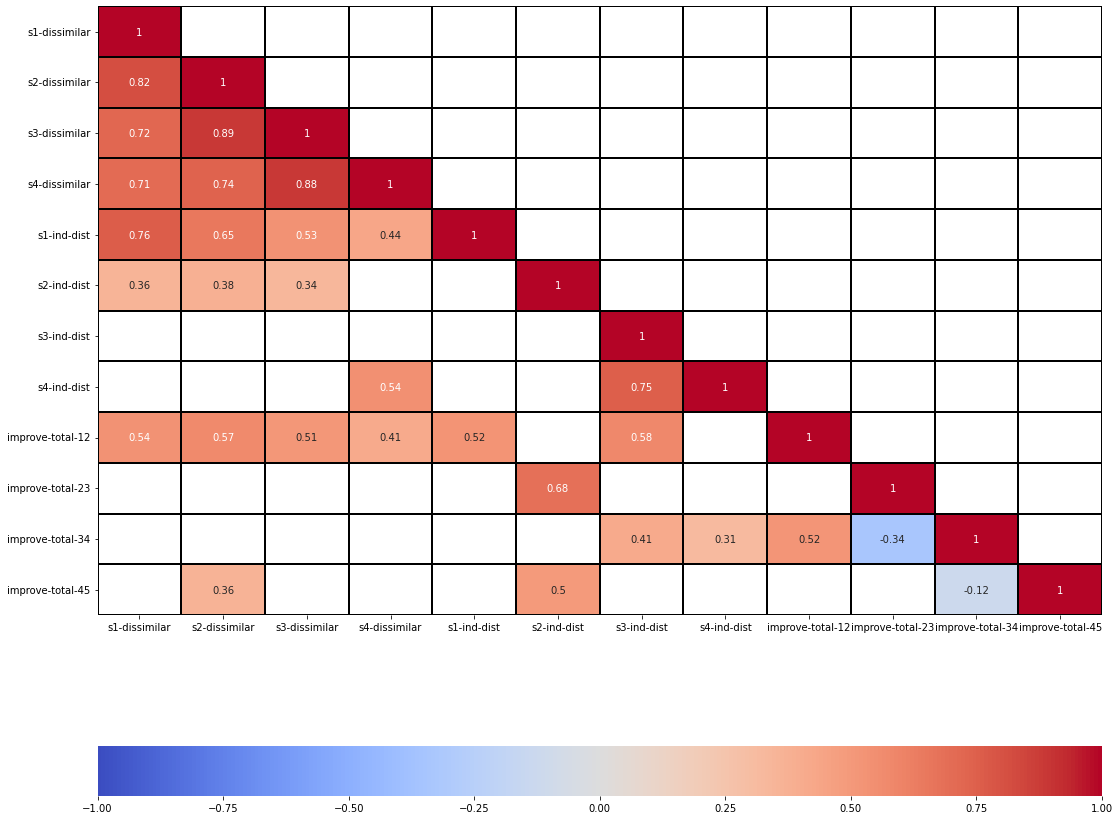

In [16]:
corr = bogota0_performance_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota0_performance_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Comment Bogota 0

> There is some significant positive correlation between total improvement score and dissimilarity and individual exploration. 

## Bogota 1 Correlations  ( Relational Novelty and Individual Exploration )

In [17]:
stage1_bogota1_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota1_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota1_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota1_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota1.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota1.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota1.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota1.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota1.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

group1_phase1_match10.rename(columns={'len_match': 'p1-len-rare', 'Student': 'user2'}, inplace=True)
group1_phase2_match10.rename(columns={'len_match': 'p2-len-rare', 'Student': 'user2'}, inplace=True)
group1_phase3_match10.rename(columns={'len_match': 'p3-len-rare', 'Student': 'user2'}, inplace=True)
group1_phase4_match10.rename(columns={'len_match': 'p4-len-rare', 'Student': 'user2'}, inplace=True)
group1_phase5_match10.rename(columns={'len_match': 'p5-len-rare', 'Student': 'user2'}, inplace=True)

group1_phase1_match10['p1-len-rare'] = group1_phase1_match10['p1-len-rare'].fillna(0)
group1_phase2_match10['p2-len-rare'] = group1_phase2_match10['p2-len-rare'].fillna(0)
group1_phase3_match10['p3-len-rare'] = group1_phase3_match10['p3-len-rare'].fillna(0)
group1_phase4_match10['p4-len-rare'] = group1_phase4_match10['p4-len-rare'].fillna(0)
group1_phase5_match10['p5-len-rare'] = group1_phase5_match10['p5-len-rare'].fillna(0)

group1_phase1_match10 = group1_phase1_match10.drop('Group', axis=1)
group1_phase2_match10 = group1_phase2_match10.drop('Group', axis=1)
group1_phase3_match10 = group1_phase3_match10.drop('Group', axis=1)
group1_phase4_match10 = group1_phase4_match10.drop('Group', axis=1)
group1_phase5_match10 = group1_phase5_match10.drop('Group', axis=1)

phase12_total_bogota1 = bogota_1[['Student', 'improve-total-12']].copy()
phase12_total_bogota1.rename(columns={'Student': 'user2'}, inplace=True)
phase23_total_bogota1 = bogota_1[['Student', 'improve-total-23']].copy()
phase23_total_bogota1.rename(columns={'Student': 'user2'}, inplace=True)
phase34_total_bogota1 = bogota_1[['Student', 'improve-total-34']].copy()
phase34_total_bogota1.rename(columns={'Student': 'user2'}, inplace=True)
phase45_total_bogota1 = bogota_1[['Student', 'improve-total-45']].copy()
phase45_total_bogota1.rename(columns={'Student': 'user2'}, inplace=True)

In [18]:
phase12_bogota1['exploration'] = 1 - phase12_bogota1['similarity']
phase23_bogota1['exploration'] = 1 - phase23_bogota1['similarity']
phase34_bogota1['exploration'] = 1 - phase34_bogota1['similarity']
phase45_bogota1['exploration'] = 1 - phase45_bogota1['similarity']

phase12_bogota1.rename(columns={'exploration': 's1-ind-dist'}, inplace=True)
phase23_bogota1.rename(columns={'exploration': 's2-ind-dist'}, inplace=True)
phase34_bogota1.rename(columns={'exploration': 's3-ind-dist'}, inplace=True)
phase45_bogota1.rename(columns={'exploration': 's4-ind-dist'}, inplace=True)

In [19]:
dfs = [stage1_bogota1_high_similarity[['user2', 's1-dissimilar']], stage2_bogota1_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota1_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota1_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota1[['user2', 's1-ind-dist']], phase23_bogota1[['user2', 's2-ind-dist']], phase34_bogota1[['user2', 's3-ind-dist']], phase45_bogota1[['user2', 's4-ind-dist']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota1_stage_metrics = df_final.drop('user2', axis=1)

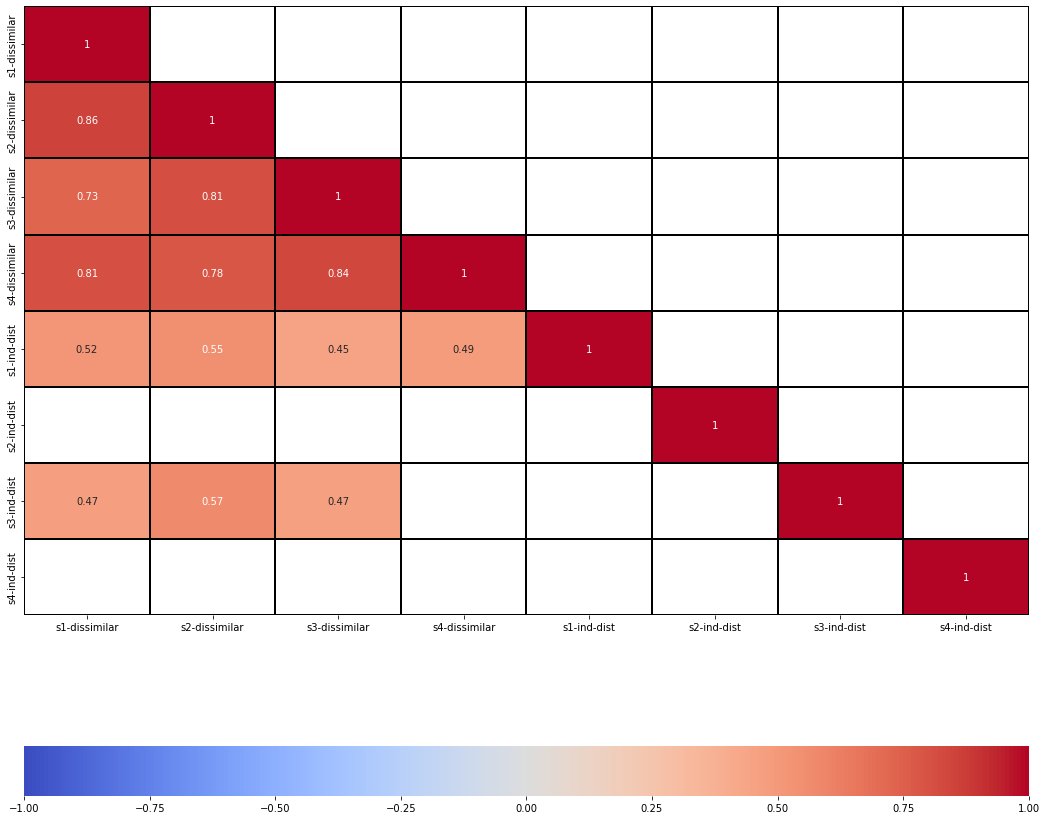

In [20]:
corr = bogota1_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 1 Correlations ( Variety and Rareness )

In [21]:
dfs = [overall_phase1_bogota1[['user2', 'p1-len-unique']], overall_phase2_bogota1[['user2', 'p2-len-unique']], overall_phase3_bogota1[['user2', 'p3-len-unique']], overall_phase4_bogota1[['user2', 'p4-len-unique']], overall_phase5_bogota1[['user2', 'p5-len-unique']], 
      group1_phase1_match10[['user2', 'p1-len-rare']], group1_phase2_match10[['user2', 'p2-len-rare']], group1_phase3_match10[['user2', 'p3-len-rare']], group1_phase4_match10[['user2', 'p4-len-rare']], group1_phase5_match10[['user2', 'p5-len-rare']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota1_phase_metrics = df_final.drop('user2', axis=1)

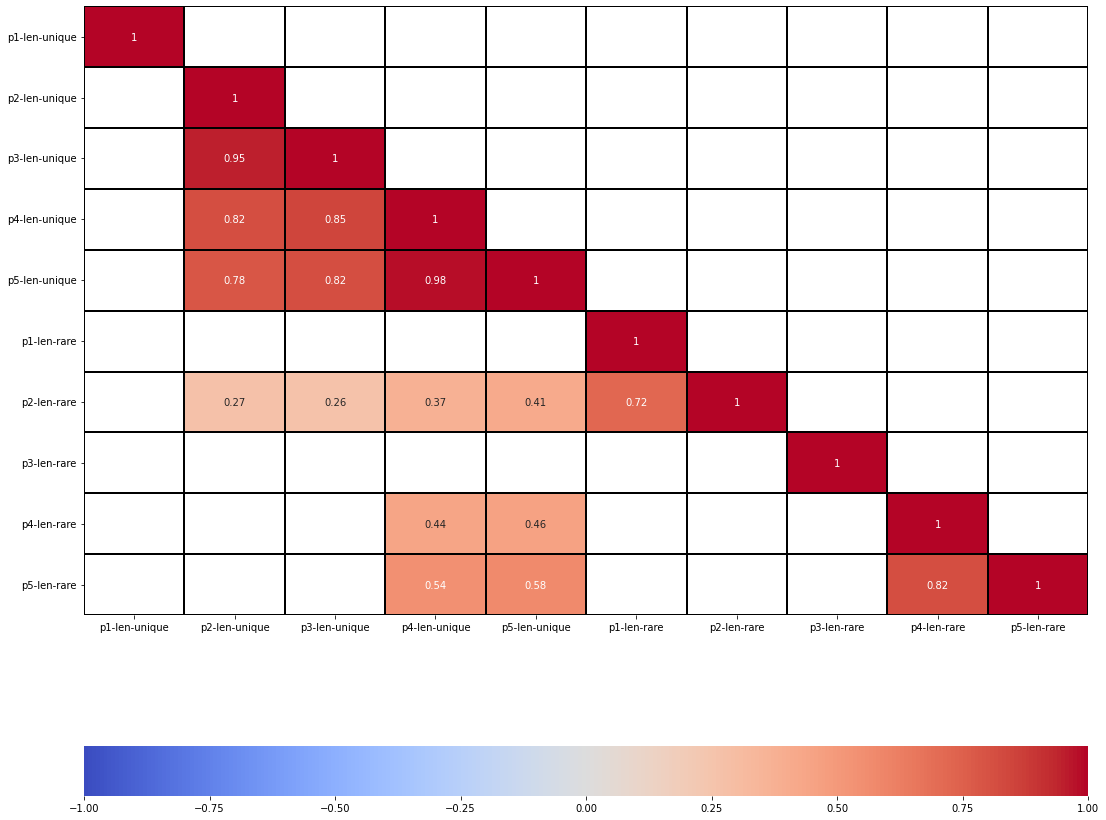

In [22]:
corr = bogota1_phase_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_phase_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 1 Correlations (Relational Novelty & Individual Exploration vs Total Improvement Score)

In [23]:
dfs = [stage1_bogota1_high_similarity[['user2', 's1-dissimilar']], stage2_bogota1_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota1_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota1_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota1[['user2', 's1-ind-dist']], phase23_bogota1[['user2', 's2-ind-dist']], phase34_bogota1[['user2', 's3-ind-dist']], phase45_bogota1[['user2', 's4-ind-dist']], 
      phase12_total_bogota1[['user2', 'improve-total-12']], phase23_total_bogota1[['user2', 'improve-total-23']], phase34_total_bogota1[['user2', 'improve-total-34']], phase45_total_bogota1[['user2', 'improve-total-45']] ]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota1_performance_metrics = df_final.drop('user2', axis=1)

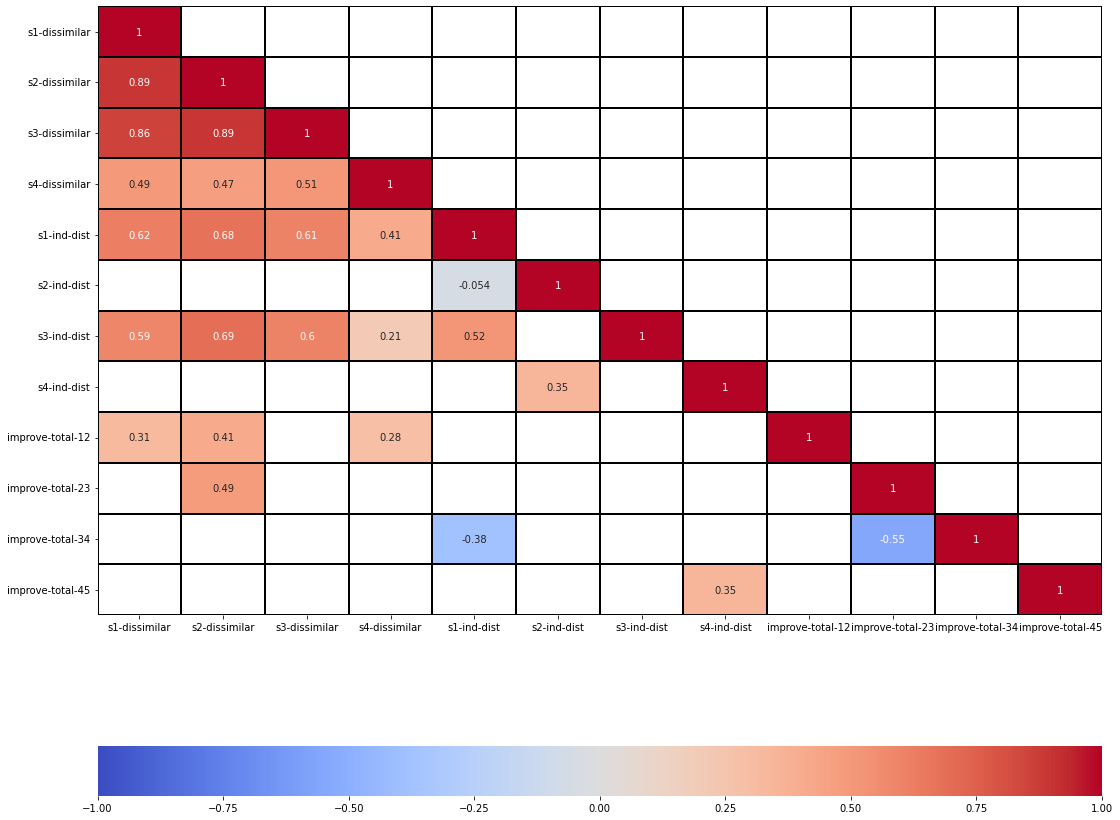

In [24]:
corr = bogota1_performance_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota1_performance_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Comments Bogota 1

## Bogota 2 Correlations ( Relational Novelty and Individual Exploration )

In [25]:
stage1_bogota2_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota2_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota2_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota2_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota2.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota2.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota2.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota2.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota2.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

group2_phase1_match10.rename(columns={'len_match': 'p1-len-rare', 'Student': 'user2'}, inplace=True)
group2_phase2_match10.rename(columns={'len_match': 'p2-len-rare', 'Student': 'user2'}, inplace=True)
group2_phase3_match10.rename(columns={'len_match': 'p3-len-rare', 'Student': 'user2'}, inplace=True)
group2_phase4_match10.rename(columns={'len_match': 'p4-len-rare', 'Student': 'user2'}, inplace=True)
group2_phase5_match10.rename(columns={'len_match': 'p5-len-rare', 'Student': 'user2'}, inplace=True)

group2_phase1_match10['p1-len-rare'] = group2_phase1_match10['p1-len-rare'].fillna(0)
group2_phase2_match10['p2-len-rare'] = group2_phase2_match10['p2-len-rare'].fillna(0)
group2_phase3_match10['p3-len-rare'] = group2_phase3_match10['p3-len-rare'].fillna(0)
group2_phase4_match10['p4-len-rare'] = group2_phase4_match10['p4-len-rare'].fillna(0)
group2_phase5_match10['p5-len-rare'] = group2_phase5_match10['p5-len-rare'].fillna(0)

group2_phase1_match10 = group2_phase1_match10.drop('Group', axis=1)
group2_phase2_match10 = group2_phase2_match10.drop('Group', axis=1)
group2_phase3_match10 = group2_phase3_match10.drop('Group', axis=1)
group2_phase4_match10 = group2_phase4_match10.drop('Group', axis=1)
group2_phase5_match10 = group2_phase5_match10.drop('Group', axis=1)

phase12_total_bogota2 = bogota_2[['Student', 'improve-total-12']].copy()
phase12_total_bogota2.rename(columns={'Student': 'user2'}, inplace=True)
phase23_total_bogota2 = bogota_2[['Student', 'improve-total-23']].copy()
phase23_total_bogota2.rename(columns={'Student': 'user2'}, inplace=True)
phase34_total_bogota2 = bogota_2[['Student', 'improve-total-34']].copy()
phase34_total_bogota2.rename(columns={'Student': 'user2'}, inplace=True)
phase45_total_bogota2 = bogota_2[['Student', 'improve-total-45']].copy()
phase45_total_bogota2.rename(columns={'Student': 'user2'}, inplace=True)

In [26]:
phase12_bogota2['exploration'] = 1 - phase12_bogota2['similarity']
phase23_bogota2['exploration'] = 1 - phase23_bogota2['similarity']
phase34_bogota2['exploration'] = 1 - phase34_bogota2['similarity']
phase45_bogota2['exploration'] = 1 - phase45_bogota2['similarity']

phase12_bogota2.rename(columns={'exploration': 's1-ind-dist'}, inplace=True)
phase23_bogota2.rename(columns={'exploration': 's2-ind-dist'}, inplace=True)
phase34_bogota2.rename(columns={'exploration': 's3-ind-dist'}, inplace=True)
phase45_bogota2.rename(columns={'exploration': 's4-ind-dist'}, inplace=True)

In [27]:
dfs = [stage1_bogota2_high_similarity[['user2', 's1-dissimilar']], stage2_bogota2_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota2_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota2_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota2[['user2', 's1-ind-dist']], phase23_bogota2[['user2', 's2-ind-dist']], phase34_bogota2[['user2', 's3-ind-dist']], phase45_bogota2[['user2', 's4-ind-dist']]]
       
df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota2_stage_metrics = df_final.drop('user2', axis=1)

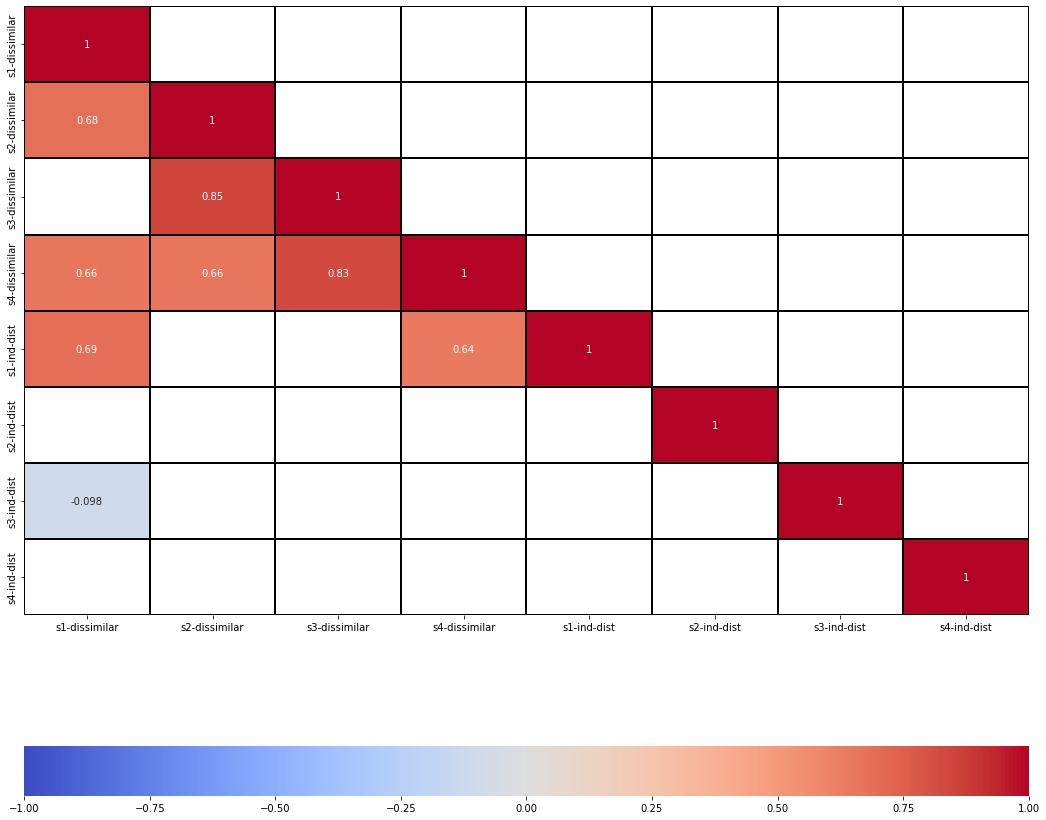

In [28]:
corr = bogota2_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota2_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 2 Correlations ( Variety and Rareness )

In [29]:
dfs = [overall_phase1_bogota2[['user2', 'p1-len-unique']], overall_phase2_bogota2[['user2', 'p2-len-unique']], overall_phase3_bogota2[['user2', 'p3-len-unique']], overall_phase4_bogota2[['user2', 'p4-len-unique']], overall_phase5_bogota2[['user2', 'p5-len-unique']], 
      group2_phase1_match10[['user2', 'p1-len-rare']], group2_phase2_match10[['user2', 'p2-len-rare']], group2_phase3_match10[['user2', 'p3-len-rare']], group2_phase4_match10[['user2', 'p4-len-rare']], group2_phase5_match10[['user2', 'p5-len-rare']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota2_phase_metrics = df_final.drop('user2', axis=1)

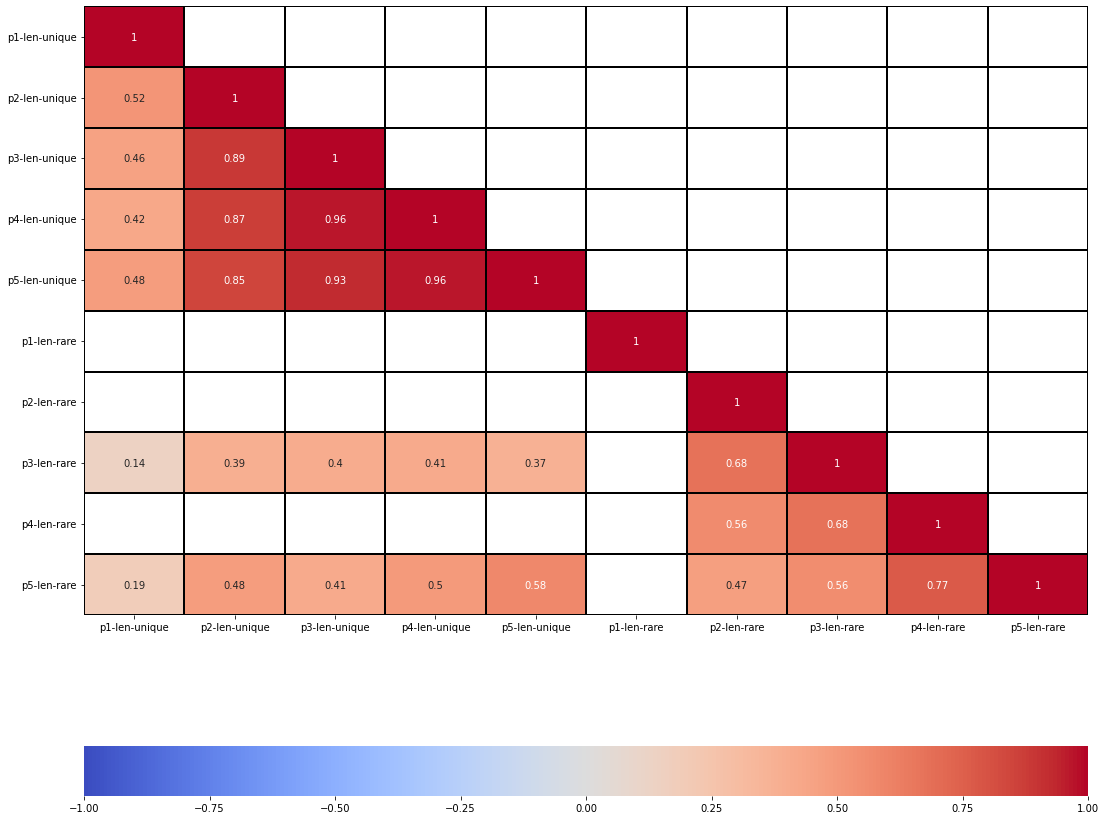

In [30]:
corr = bogota2_phase_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota2_phase_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 2 Correlations (Relational Novelty & Individual Exploration vs Total Improvement Score)

In [31]:
dfs = [stage1_bogota2_high_similarity[['user2', 's1-dissimilar']], stage2_bogota2_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota2_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota2_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota2[['user2', 's1-ind-dist']], phase23_bogota2[['user2', 's2-ind-dist']], phase34_bogota2[['user2', 's3-ind-dist']], phase45_bogota2[['user2', 's4-ind-dist']], 
       phase12_total_bogota2[['user2', 'improve-total-12']], phase23_total_bogota2[['user2', 'improve-total-23']], phase34_total_bogota2[['user2', 'improve-total-34']], phase45_total_bogota2[['user2', 'improve-total-45']]]
       
df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota2_performance_metrics = df_final.drop('user2', axis=1)

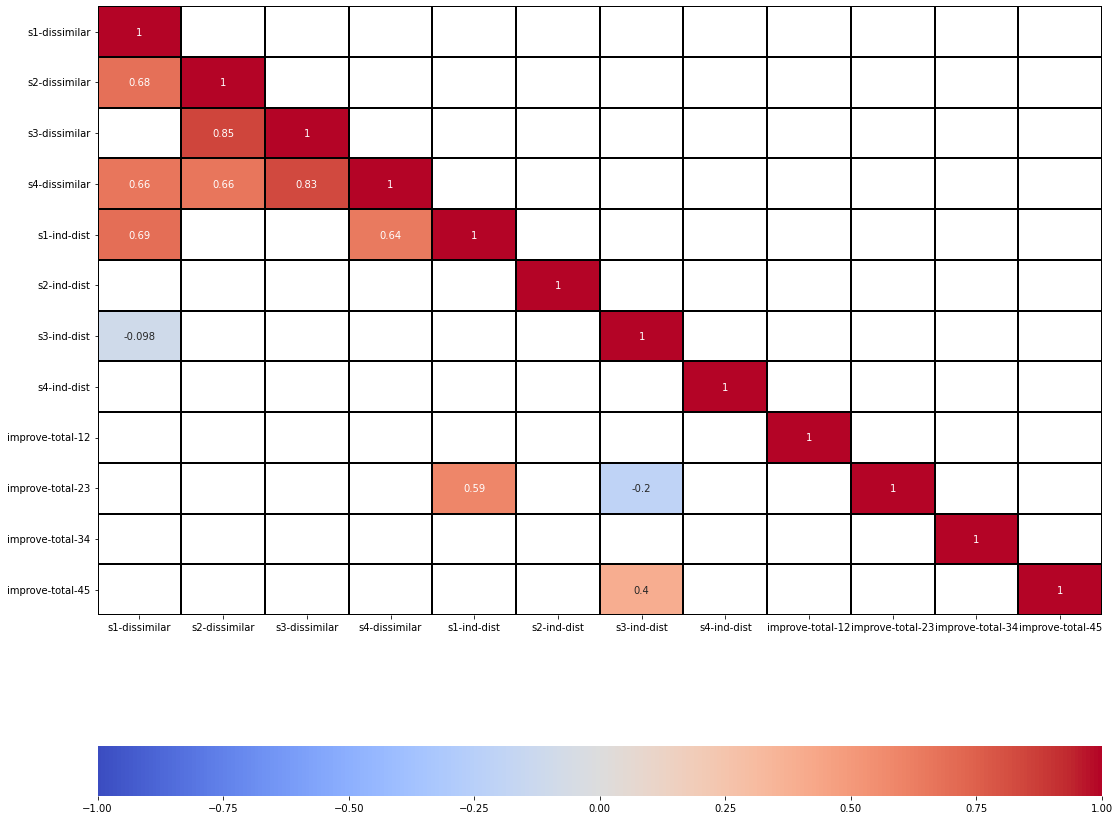

In [32]:
corr = bogota2_performance_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota2_performance_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 3 Correlations ( Relational Novelty and Individual Exploration )

In [33]:
stage1_bogota3_high_similarity.rename(columns={'similarity': 's1-dissimilar'}, inplace=True)
stage2_bogota3_high_similarity.rename(columns={'similarity': 's2-dissimilar'}, inplace=True)
stage3_bogota3_high_similarity.rename(columns={'similarity': 's3-dissimilar'}, inplace=True)
stage4_bogota3_high_similarity.rename(columns={'similarity': 's4-dissimilar'}, inplace=True)

overall_phase1_bogota3.rename(columns={'len_unique': 'p1-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase2_bogota3.rename(columns={'len_unique': 'p2-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase3_bogota3.rename(columns={'len_unique': 'p3-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase4_bogota3.rename(columns={'len_unique': 'p4-len-unique', 'Student': 'user2'}, inplace=True)
overall_phase5_bogota3.rename(columns={'len_unique': 'p5-len-unique', 'Student': 'user2'}, inplace=True)

group3_phase1_match10.rename(columns={'len_match': 'p1-len-rare', 'Student': 'user2'}, inplace=True)
group3_phase2_match10.rename(columns={'len_match': 'p2-len-rare', 'Student': 'user2'}, inplace=True)
group3_phase3_match10.rename(columns={'len_match': 'p3-len-rare', 'Student': 'user2'}, inplace=True)
group3_phase4_match10.rename(columns={'len_match': 'p4-len-rare', 'Student': 'user2'}, inplace=True)
group3_phase5_match10.rename(columns={'len_match': 'p5-len-rare', 'Student': 'user2'}, inplace=True)

group3_phase1_match10['p1-len-rare'] = group3_phase1_match10['p1-len-rare'].fillna(0)
group3_phase2_match10['p2-len-rare'] = group3_phase2_match10['p2-len-rare'].fillna(0)
group3_phase3_match10['p3-len-rare'] = group3_phase3_match10['p3-len-rare'].fillna(0)
group3_phase4_match10['p4-len-rare'] = group3_phase4_match10['p4-len-rare'].fillna(0)
group3_phase5_match10['p5-len-rare'] = group3_phase5_match10['p5-len-rare'].fillna(0)

group3_phase1_match10 = group3_phase1_match10.drop('Group', axis=1)
group3_phase2_match10 = group3_phase2_match10.drop('Group', axis=1)
group3_phase3_match10 = group3_phase3_match10.drop('Group', axis=1)
group3_phase4_match10 = group3_phase4_match10.drop('Group', axis=1)
group3_phase5_match10 = group3_phase5_match10.drop('Group', axis=1)

phase12_total_bogota3 = bogota_3[['Student', 'improve-total-12']].copy()
phase12_total_bogota3.rename(columns={'Student': 'user2'}, inplace=True)
phase23_total_bogota3 = bogota_3[['Student', 'improve-total-23']].copy()
phase23_total_bogota3.rename(columns={'Student': 'user2'}, inplace=True)
phase34_total_bogota3 = bogota_3[['Student', 'improve-total-34']].copy()
phase34_total_bogota3.rename(columns={'Student': 'user2'}, inplace=True)
phase45_total_bogota3 = bogota_3[['Student', 'improve-total-45']].copy()
phase45_total_bogota3.rename(columns={'Student': 'user2'}, inplace=True)

In [34]:
phase12_bogota3['exploration'] = 1 - phase12_bogota3['similarity']
phase23_bogota3['exploration'] = 1 - phase23_bogota3['similarity']
phase34_bogota3['exploration'] = 1 - phase34_bogota3['similarity']
phase45_bogota3['exploration'] = 1 - phase45_bogota3['similarity']

phase12_bogota3.rename(columns={'similarity': 's1-ind-dist'}, inplace=True)
phase23_bogota3.rename(columns={'similarity': 's2-ind-dist'}, inplace=True)
phase34_bogota3.rename(columns={'similarity': 's3-ind-dist'}, inplace=True)
phase45_bogota3.rename(columns={'similarity': 's4-ind-dist'}, inplace=True)

In [35]:
dfs = [stage1_bogota3_high_similarity[['user2', 's1-dissimilar']], stage2_bogota3_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota3_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota3_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota3[['user2', 's1-ind-dist']], phase23_bogota3[['user2', 's2-ind-dist']], phase34_bogota3[['user2', 's3-ind-dist']], phase45_bogota3[['user2', 's4-ind-dist']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota3_stage_metrics = df_final.drop('user2', axis=1)

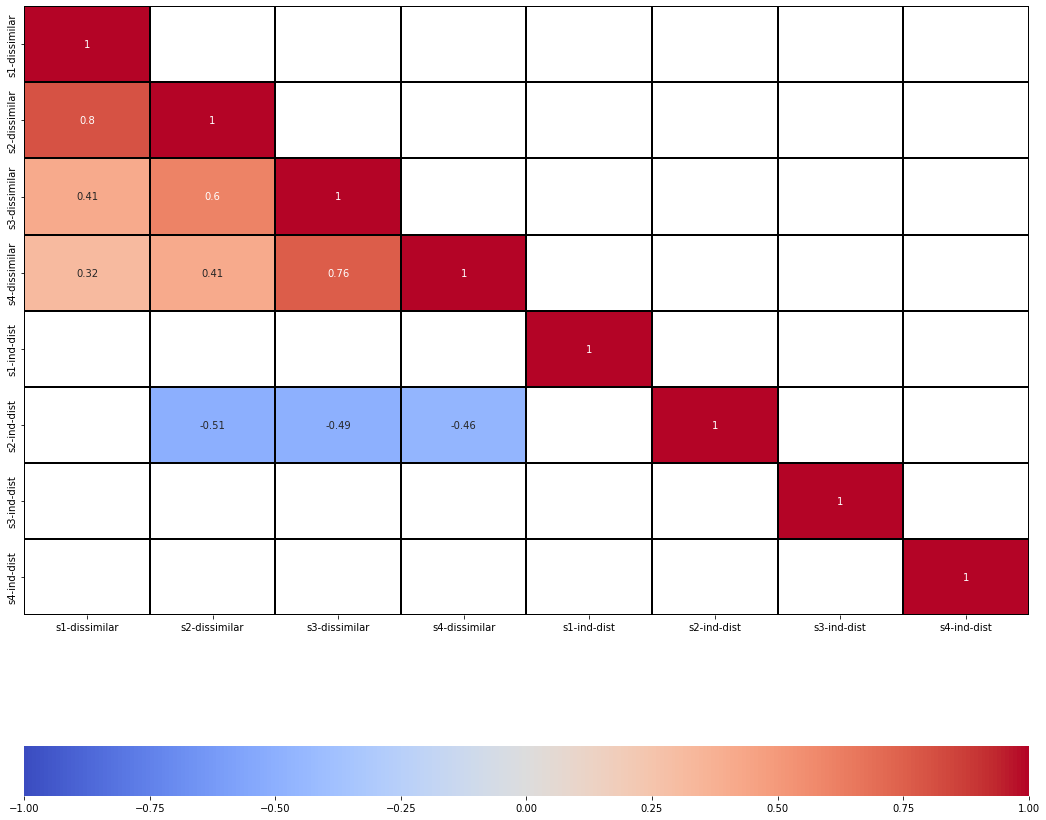

In [36]:
corr = bogota3_stage_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota3_stage_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 3 Correlation ( Variety and Rareness )

In [37]:
dfs = [overall_phase1_bogota3[['user2', 'p1-len-unique']], overall_phase2_bogota3[['user2', 'p2-len-unique']], overall_phase3_bogota3[['user2', 'p3-len-unique']], overall_phase4_bogota3[['user2', 'p4-len-unique']], overall_phase5_bogota3[['user2', 'p5-len-unique']], 
      group3_phase1_match10[['user2', 'p1-len-rare']], group3_phase2_match10[['user2', 'p2-len-rare']], group3_phase3_match10[['user2', 'p3-len-rare']], group3_phase4_match10[['user2', 'p4-len-rare']], group3_phase5_match10[['user2', 'p5-len-rare']]]

df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota3_phase_metrics = df_final.drop('user2', axis=1)

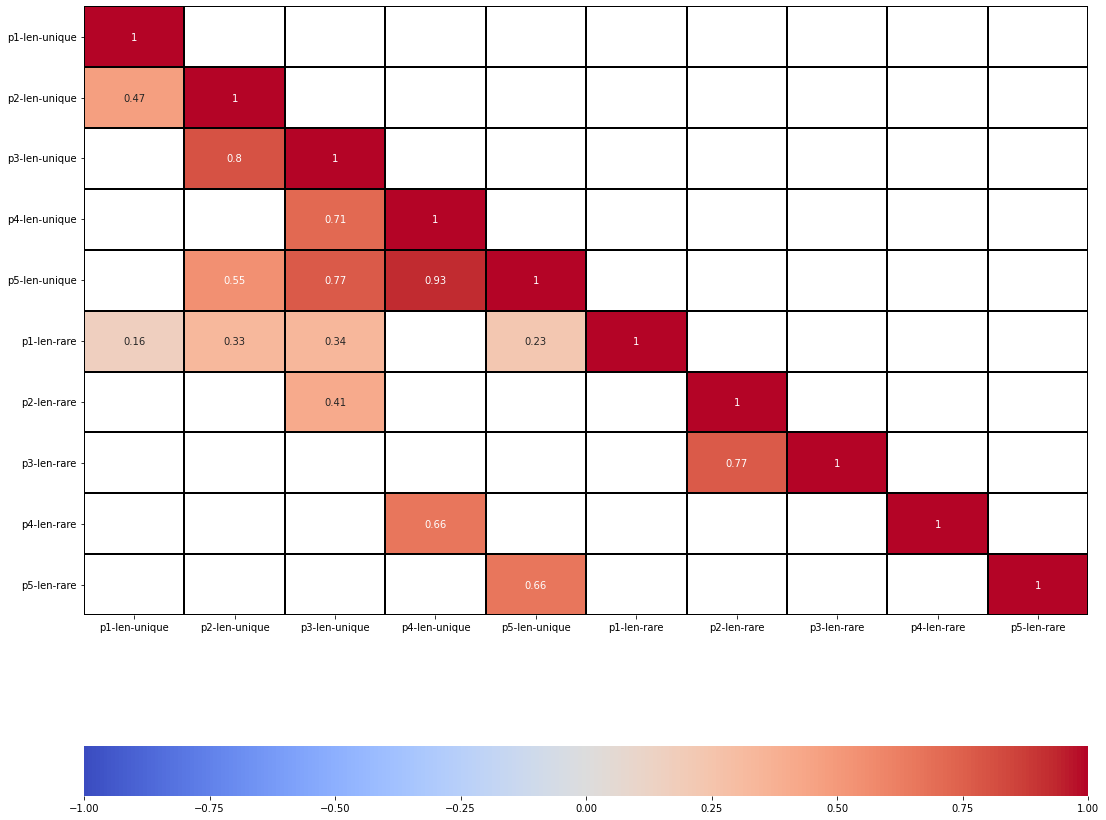

In [38]:
corr = bogota3_phase_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota3_phase_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)

## Bogota 3 Correlations (Relational Novelty & Individual Exploration vs Total Improvement Score)

In [39]:
dfs = [stage1_bogota3_high_similarity[['user2', 's1-dissimilar']], stage2_bogota3_high_similarity[['user2', 's2-dissimilar']],  stage3_bogota3_high_similarity[['user2', 's3-dissimilar']],  stage4_bogota3_high_similarity[['user2', 's4-dissimilar']], 
       phase12_bogota3[['user2', 's1-ind-dist']], phase23_bogota3[['user2', 's2-ind-dist']], phase34_bogota3[['user2', 's3-ind-dist']], phase45_bogota3[['user2', 's4-ind-dist']],
       phase12_total_bogota3[['user2', 'improve-total-12']], phase23_total_bogota3[['user2', 'improve-total-23']], phase34_total_bogota3[['user2', 'improve-total-34']], phase45_total_bogota3[['user2', 'improve-total-45']]]
df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='user2'), dfs)
bogota3_performance_metrics = df_final.drop('user2', axis=1)

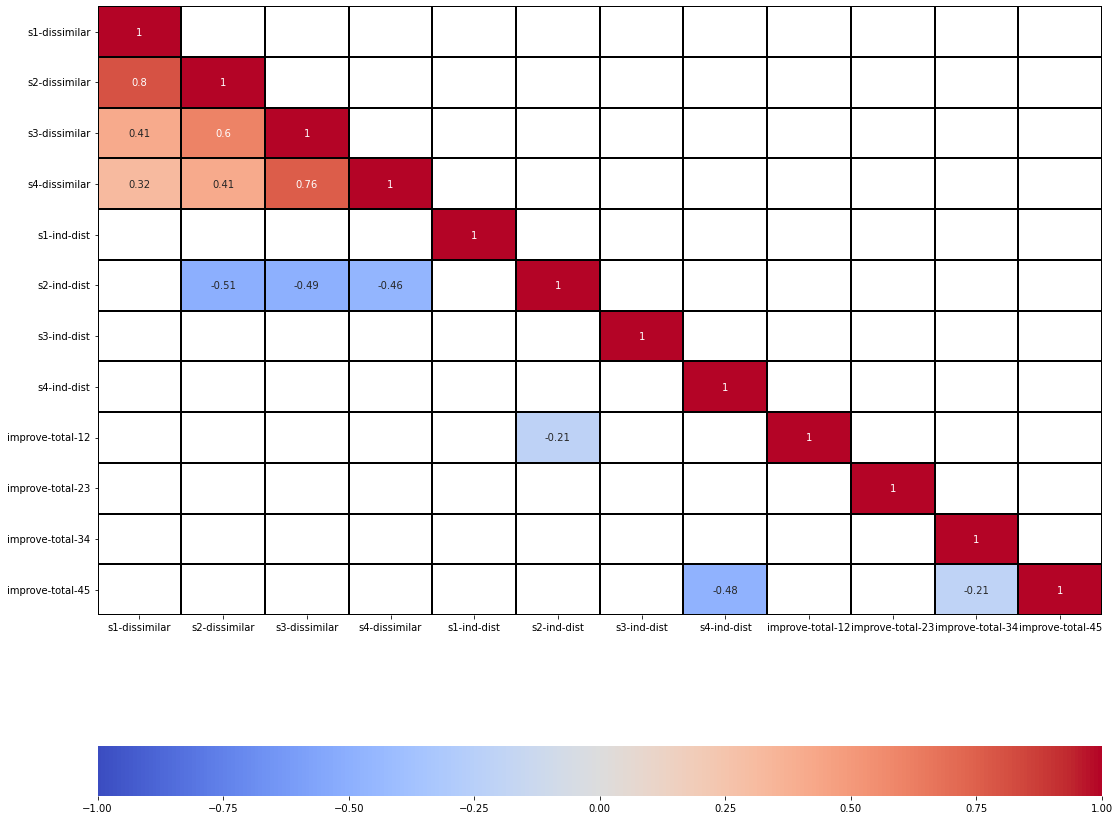

In [40]:
corr = bogota3_performance_metrics.corr(method='spearman')                            # get correlation
p_values = corr_sig(bogota3_performance_metrics)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)